In [10]:
import nltk
nltk.download('gutenberg')
nltk.download('punkt')
from nltk.corpus import gutenberg

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [7]:
file_ids = gutenberg.fileids()
print("Gutenberg Corpus File IDs:")
print(file_ids)

Gutenberg Corpus File IDs:
['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


In [11]:
for file_id in file_ids:
    num_words = len(gutenberg.words(file_id))
    num_sentences = len(gutenberg.sents(file_id))
    num_chars = len(gutenberg.raw(file_id))

    print("\nFile ID:", file_id)
    print("Number of Words:", num_words)
    print("Number of Sentences:", num_sentences)
    print("Number of Characters:", num_chars)

    print("\nFirst 5 sentences:")
    print(gutenberg.sents(file_id)[:5])

    print("\nFirst 100 characters:")
    print(gutenberg.raw(file_id)[:10000])

    print("\n" + "="*50 + "\n")


File ID: austen-emma.txt
Number of Words: 192427
Number of Sentences: 7752
Number of Characters: 887071

First 5 sentences:
[['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']'], ['VOLUME', 'I'], ['CHAPTER', 'I'], ['Emma', 'Woodhouse', ',', 'handsome', ',', 'clever', ',', 'and', 'rich', ',', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', ',', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', ';', 'and', 'had', 'lived', 'nearly', 'twenty', '-', 'one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her', '.'], ['She', 'was', 'the', 'youngest', 'of', 'the', 'two', 'daughters', 'of', 'a', 'most', 'affectionate', ',', 'indulgent', 'father', ';', 'and', 'had', ',', 'in', 'consequence', 'of', 'her', 'sister', "'", 's', 'marriage', ',', 'been', 'mistress', 'of', 'his', 'house', 'from', 'a', 'very', 'early', 'period', '.']]

First 100 characters:
[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emm

In [12]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import FreqDist
from nltk.tokenize import RegexpTokenizer, wordpunct_tokenize

# Download the NLTK data
nltk.download('punkt')

# Load the Shakespeare text
shakespeare_text = nltk.corpus.gutenberg.raw('shakespeare-hamlet.txt')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [13]:

word_tokens = word_tokenize(shakespeare_text)

sentence_tokens = sent_tokenize(shakespeare_text)

char_tokenizer = RegexpTokenizer(r'\w+|[^\w\s]')

bpe_tokens = char_tokenizer.tokenize(shakespeare_text)


In [14]:
# Display the results
print("Word Tokenization using Penn Treebank:")
print(word_tokens[:20])  # Displaying the first 20 words

print("\nSentence Tokenization:")
print(sentence_tokens[:3])  # Displaying the first 3 sentences

print("\nByte Pair Encoding (BPE):")
print(bpe_tokens[:20])  # Displaying the first 20 BPE tokens

Word Tokenization using Penn Treebank:
['[', 'The', 'Tragedie', 'of', 'Hamlet', 'by', 'William', 'Shakespeare', '1599', ']', 'Actus', 'Primus', '.', 'Scoena', 'Prima', '.', 'Enter', 'Barnardo', 'and', 'Francisco']

Sentence Tokenization:
['[The Tragedie of Hamlet by William Shakespeare 1599]\n\n\nActus Primus.', 'Scoena Prima.', 'Enter Barnardo and Francisco two Centinels.']

Byte Pair Encoding (BPE):
['[', 'The', 'Tragedie', 'of', 'Hamlet', 'by', 'William', 'Shakespeare', '1599', ']', 'Actus', 'Primus', '.', 'Scoena', 'Prima', '.', 'Enter', 'Barnardo', 'and', 'Francisco']


Length of Tokens: 85
Number of Sentences: 3
Occurrence of 'NLP': 0
Top 5 Highest Frequency Words: [(',', 9), ('and', 4), ('the', 3), ('to', 3), ('.', 3)]


<Figure size 1000x500 with 0 Axes>

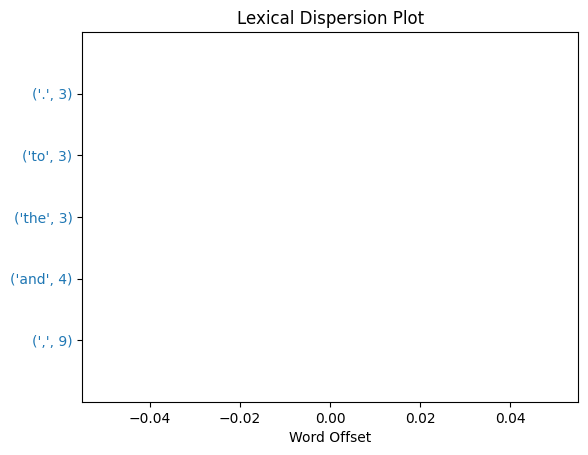

In [20]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

# Create a simple corpus (you can replace this with your own text)
corpus = """
Natural language processing (NLP) is a machine learning technology that gives computers the ability to interpret, manipulate, and comprehend human language. Organizations today have large volumes of voice and text data from various communication channels like emails, text messages, social media newsfeeds, video, audio, and more. They use NLP software to automatically process this data, analyze the intent or sentiment in the message, and respond in real time to human communication.
"""

# Tokenize the corpus into words
word_tokens = word_tokenize(corpus.lower())  # Convert to lowercase for case-insensitive analysis

# Find the length of tokens
num_tokens = len(word_tokens)

# Find the number of sentences
num_sentences = len(sent_tokenize(corpus))

# Use frequency distribution to find the occurrence of words
freq_dist = FreqDist(word_tokens)

# Find the occurrence of a particular word (e.g., 'NLP')
word_occurrence = freq_dist['NLP']

# Top 5 highest frequency words
top_words = freq_dist.most_common(5)

# Show a dispersion plot for the top 5 words
plt.figure(figsize=(10, 5))
nltk.draw.dispersion_plot(word_tokens, top_words[:5])

# Display the results
print(f"Length of Tokens: {num_tokens}")
print(f"Number of Sentences: {num_sentences}")
print(f"Occurrence of 'NLP': {word_occurrence}")
print(f"Top 5 Highest Frequency Words: {top_words}")

# Show the dispersion plot
plt.show()


<Figure size 1200x600 with 0 Axes>

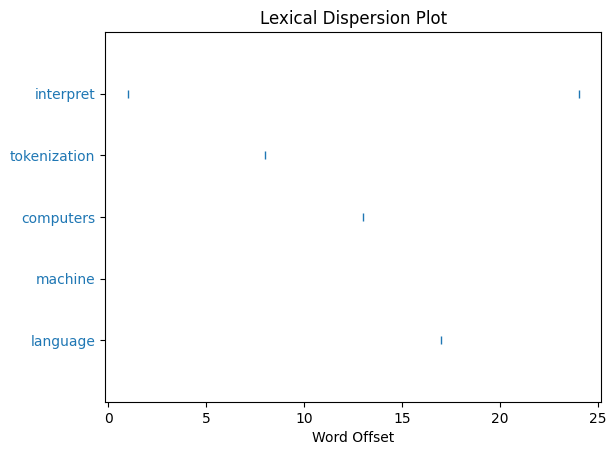

In [21]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

# Sample corpus (replace with your own text)
corpus = """
Natural language processing (NLP) is a machine learning technology that gives computers the ability to interpret, manipulate, and comprehend human language. Organizations today have large volumes of voice and text data from various communication channels like emails, text messages, social media newsfeeds, video, audio, and more. They use NLP software to automatically process this data, analyze the intent or sentiment in the message, and respond in real time to human communication.
"""

# Tokenize the corpus into words
word_tokens = word_tokenize(corpus.lower())  # Convert to lowercase for case-insensitive analysis

# Create a dispersion plot for the top 5 words
plt.figure(figsize=(12, 6))

# Define the words for the dispersion plot
target_words = ['language', 'machine', 'computers', 'tokenization', 'interpret']

# Plot the dispersion of the target words
nltk.draw.dispersion_plot(word_tokens, target_words)

# Show the dispersion plot
plt.show()
